# Case Study on Correlation and Regression

**A textile company regularly spent money on five advertising companies for their ads.**
(Data set: Add_sales_data_2018.csv)
1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.
2. Build a regression model to predict the profit from the given data and comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
|Advt. of company |Amound Spend|
|-|-|
|Add1(in Thousands)| 290|
|Add2(in Thousands)| 312|
|Add3(in Thousands)| 309|
|Add4(in Thousands)| 298|
|Add5(in Thousands)| 320|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
ad=pd.read_csv('Add_sales_data_2018.csv')

#### Data preprocessing 

In [3]:
ad.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
ad.shape

(205, 7)

In [5]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [6]:
ad.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [7]:
ad.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


**Data Understandings:**
1. In the given data set, the amount spent for advertising through five different companies and profit generated.
2. There are 7 columns, among them except **profit which is the target(dependent variable) all others (ie. 6) are features(independent variable)**.
3. There is **no null or missing values** in the data set.
4. Except the date feature which is an **object data type** all others are **float with 64** bit datatype.
5. There are **205 observations** are included within this data set.

### 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

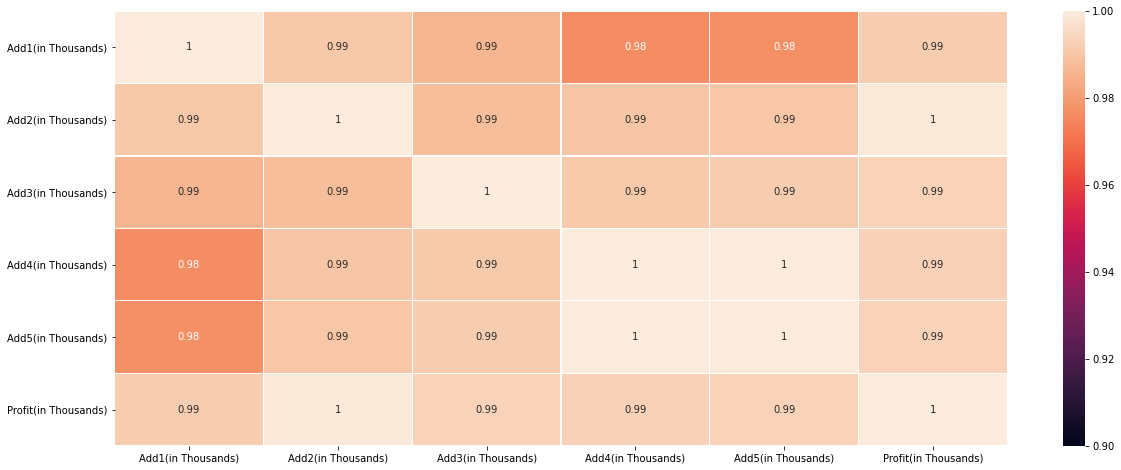

In [8]:
corrmatrix=ad.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.9,vmax=1,annot=True,linewidth=0.3)
plt.show()

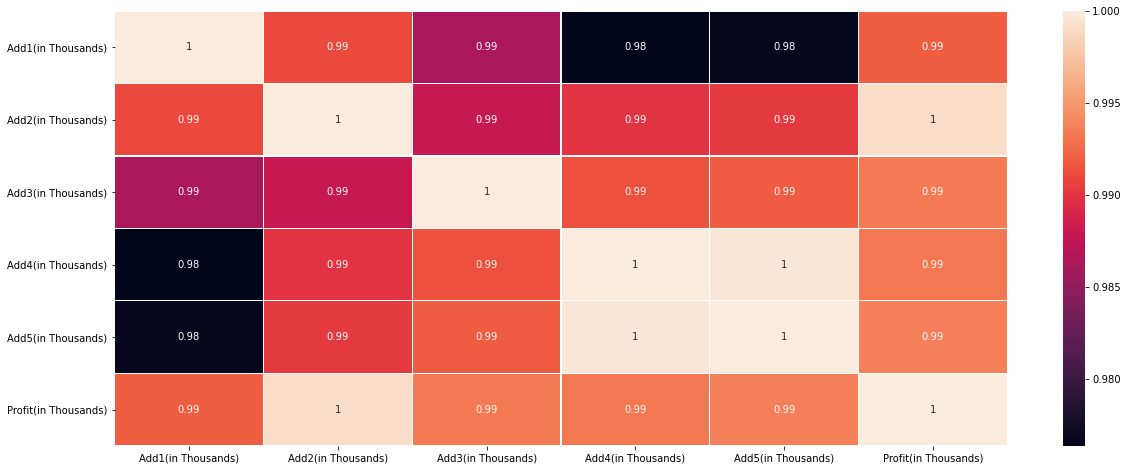

In [9]:
corrmatrix=ad.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,linewidth=0.3)
plt.show()

**Findings:**
1. From the correlation matrics, it is clear that the variables have very high/strong positive correlation.
2. By closely observing the correlation coefficient (r), there are some feaures have same high positive correlation.
3. Among the 5 features Add2 having strong positive correlation (r=1) with the target, Profit.
4. Add1,3,4,5 have same strong positive correlation (r=0.99) with the target, Profit.

### 2. Build a regression model to predict the profit from the given data and comment your findings on it.

Inorder to buid a regression model, first we want check the correlation between variables in the data.

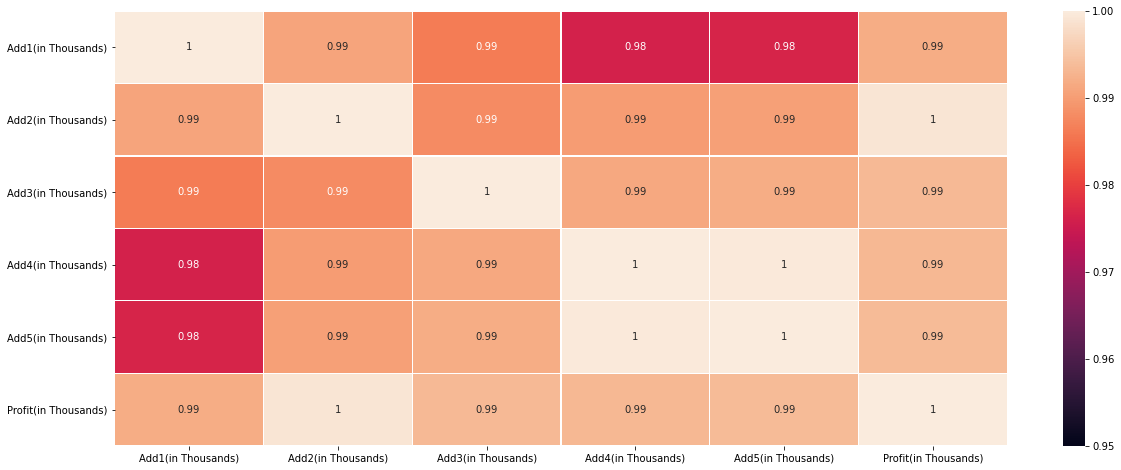

In [10]:
corrmatrix=ad.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.95,vmax=1,annot=True,linewidth=0.3)
plt.show()

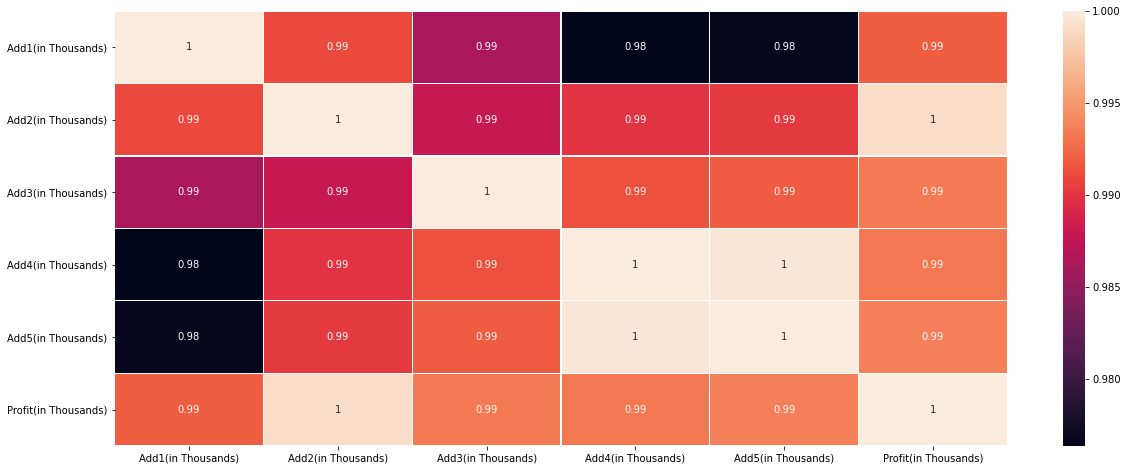

In [11]:
corrmatrix=ad.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,linewidth=0.3)
plt.show()

* From this we can see the correlations between the variables that are available in the data set.
* By close observation we can see that Add1 & Add2, Add1 & Add3 (# group 1)have same strong positive correlation coefficient of 0.99.
* Similarly for Add1 & Add4, Add1 & Add5 (# group 2)have same high positive correlation, with r=0.98.
* In this case, we can reduce the features having same r values.
* So, we can remove features with comparitively low r value with the taraget variable, Profit.
* There fore, we can **drop Add1 & Add3 from first group and Add1 & Add5**(Add1,4,5 have same r value with Profit, so we can keep any one of them).

In [12]:
ad.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [13]:
ad.shape

(205, 7)

### #Trial1

In [14]:
ad1=ad.drop(['Add5(in Thousands)','Date'],axis=1)
ad1.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [15]:
ad1.shape

(205, 5)

In [16]:
y1=ad1['Profit(in Thousands)']
x1=ad1.drop(['Profit(in Thousands)'],axis=1)

In [17]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.25)

In [18]:
lr1=linear_model.LinearRegression()
model1=lr1.fit(x1_train,y1_train)

In [19]:
x1.shape

(205, 4)

In [20]:
predictions1=model1.predict(x1_test)

In [21]:
print(y1_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [22]:
print(predictions1)

[4150.88763487 4447.12592965 5133.38031159 4908.26829527 5002.14153915
 4624.18120031 5383.91839828 5328.00021054 5175.58914749 5956.55978675
 5780.89267376 4996.82977447 5076.07968284 5785.53438512 4935.74329169
 5065.84268445 4190.97345105 5034.52167751 5016.93984512 5134.84339471
 5144.92669903 5421.54918213 4569.54364815 4598.61444531 4436.038698
 4176.1770066  5617.3439695  5667.21781797 4648.70261308 5717.90555255
 5002.57699893 5182.40483872 5017.28686642 5544.93173696 5012.72424152
 5028.10954386 5108.59497872 4761.72838332 4607.60239375 4925.98150005
 5249.67337825 5037.90852212 5491.69210158 5020.81890704 4647.66638615
 4486.42826505 4436.03686862 5300.51553142 5425.05225364 4482.17658881
 4192.91620815 6063.57269524]


In [64]:
mse1=mean_squared_error(y1_test,predictions1)
print('MSE is :',mean_squared_error(y1_test,predictions1))
print('Rounded MSE value is %0.2f'%mean_squared_error(y1_test,predictions1))
rsquare=r2_score(y1_test,predictions1)
print('R^2 value :',r2_score(y1_test,predictions1))
print('Rounded R^2 value : %0.2f'%r2_score(y1_test,predictions1))

MSE is : 0.5381640443754303
Rounded MSE value is 0.54
R^2 value : 0.999997497556807
Rounded R^2 value : 1.00


In [67]:
# Method1 for finding adjusted r-square value
var1_test = y1_test.var()
Adj1_rsquare = 1-(mse1/var1_test)
print('Adjusted R^2 value:',Adj1_rsquare)
print('Rounded adjusted R^2 value: %0.2f'% Adj1_rsquare)

Adjusted R^2 value: 0.9999975456807145
Rounded adjusted R^2 value: 1.00


In [65]:
# Method2 for finding adjusted r-square value
adj1_rsquare=1-(((x1.shape[0]-1)/(x1.shape[0]-x1.shape[1]-1))*(1-rsquare))
print('Adjusted R^2 value:',adj1_rsquare)
print('Rounded adjusted R^2 value: %0.2f'% adj1_rsquare)

Adjusted R^2 value: 0.9999974475079432
Rounded adjusted R^2 value: 1.00


In [34]:
model1.intercept_

-0.1951707349599019

In [35]:
model1.coef_

array([ 0.97317652, 12.43994559,  3.54702319,  1.8201929 ])

### #Trial 2

In [36]:
ad.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [37]:
ad2=ad.drop(['Date'],axis=1)
ad2.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [38]:
y2=ad2['Profit(in Thousands)']
x2=ad2.drop(['Profit(in Thousands)'],axis=1)

In [39]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,random_state=42,test_size=0.25)

In [40]:
lr2=linear_model.LinearRegression()
model2=lr2.fit(x2_train,y2_train)

In [41]:
predictions2=model2.predict(x2_test)

In [42]:
print(y2_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [43]:
print(predictions2)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457]


In [63]:
mse2=mean_squared_error(y2_test,predictions2)
print('MSE value is:',mean_squared_error(y2_test,predictions2))
print('Rounded MSE values is :%0.2f'%mean_squared_error(y2_test,predictions2))
print('R^2 value :',r2_score(y2_test,predictions2))

MSE value is: 5.408488620539027e-25
Rounded MSE values is :0.00
R^2 value : 1.0


In [69]:
# Method1 for finding adjusted r-square value
var2_test = y2_test.var()
Adj2_rsquare = 1-(mse2/var2_test)
print('Adjusted R^2 value:',Adj2_rsquare)

Adjusted R^2 value: 1.0


In [68]:
# Method2 for finding adjusted r-square value
adj2_rsquare=1-(((x2.shape[0]-1)/(x2.shape[0]-x2.shape[1]-1))*(1-rsquare))
print('Adjusted R^2 value:',adj2_rsquare)
print('Rounded adjusted R^2 value: %0.2f'% adj2_rsquare)

Adjusted R^2 value: 0.9999974346813499
Rounded adjusted R^2 value: 1.00


In [50]:
model2.intercept_

1.8189894035458565e-12

In [51]:
model2.coef_

array([ 1.  , 12.38,  3.5 ,  1.  ,  0.9 ])

### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

|Advt. of company |Amound Spend|
|-|-|
|Add1(in Thousands)| 290|
|Add2(in Thousands)| 312|
|Add3(in Thousands)| 309|
|Add4(in Thousands)| 298|
|Add5(in Thousands)| 320|

In [52]:
x1.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands)
0,208.00,222.25,206.85,216.00
1,217.00,218.60,205.90,210.25
2,223.50,227.80,216.15,217.25
3,230.00,237.50,225.75,226.45
4,234.55,234.60,221.05,230.30


In [53]:
x2.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,208.00,222.25,206.85,216.00,215.15
1,217.00,218.60,205.90,210.25,209.20
2,223.50,227.80,216.15,217.25,218.20
3,230.00,237.50,225.75,226.45,227.60
4,234.55,234.60,221.05,230.30,230.90


In [71]:
make_prediction1=[[290,312,309,298]]
print('Predicted profit is:',(model1.predict(make_prediction1).item()))
print('Rounded value of predicted profit is:%0.2f'%(model1.predict(make_prediction1).item()))

Predicted profit is: 5801.736693174622
Rounded value of predicted profit is:5801.74


In [72]:
make_prediction2=[[290,312,309,298,320]]
print('Predicted profit is:',(model2.predict(make_prediction2).item()))
print('Rounded value of predicted profit is:%0.2f'%(model2.predict(make_prediction2).item()))

Predicted profit is: 5820.060000000001
Rounded value of predicted profit is:5820.06
